In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"saraelwakeel","key":"e256887b59a198a0e34c2d785bdb1742"}'}

In [ ]:
# Make a directory for Kaggle and copy the key file
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset from Kaggle
!kaggle datasets download -d altavish/boston-housing-dataset

Dataset URL: https://www.kaggle.com/datasets/altavish/boston-housing-dataset
License(s): CC0-1.0
  0% 0.00/11.7k [00:00<?, ?B/s]
100% 11.7k/11.7k [00:00<00:00, 26.7MB/s]


In [ ]:
# Unzip the downloaded dataset
!unzip boston-housing-dataset.zip

Archive:  boston-housing-dataset.zip
  inflating: HousingData.csv         


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/HousingData.csv')
print(data.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
# Display dataset information
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242   

In [ ]:
# Handle duplicates
duplicates = data[data.duplicated()]
print(f"Number of duplicates: {len(duplicates)}")



Number of duplicates: 0


In [ ]:
data = data.drop_duplicates()

In [ ]:
# Check for null values
null_counts = data.isnull().sum()
print("Null values before handling:")
print(null_counts)

Null values before handling:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64


In [ ]:
# Fill null values with the mean for numerical columns
numerical_cols = data.select_dtypes(include=np.number).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].mean())

In [ ]:
nulls = data.isnull().sum()
print("Null values after handling:")
print(nulls)


Null values after handling:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


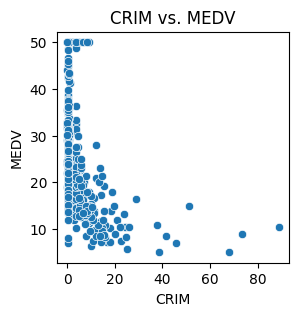

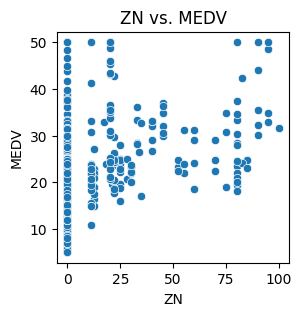

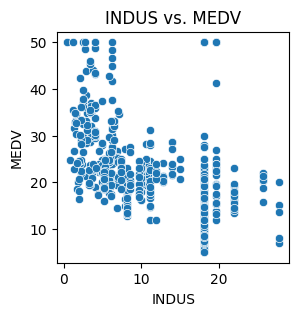

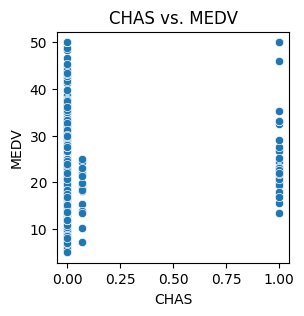

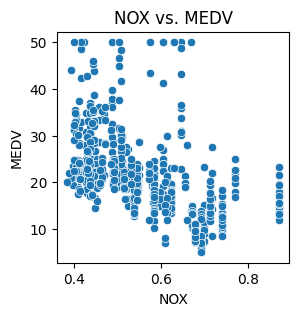

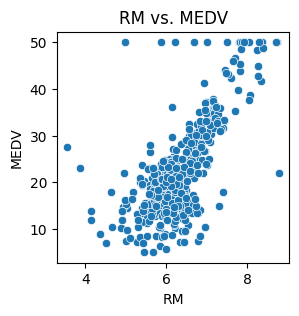

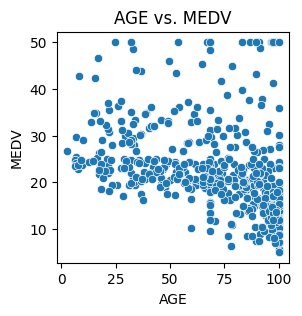

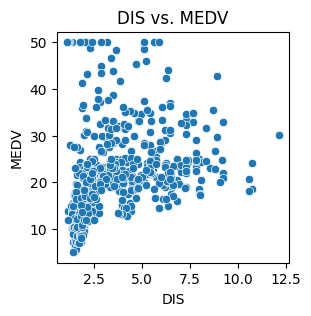

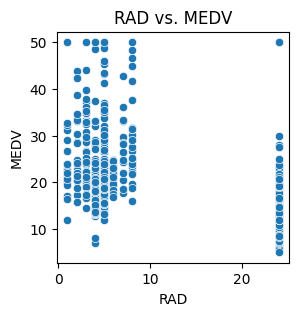

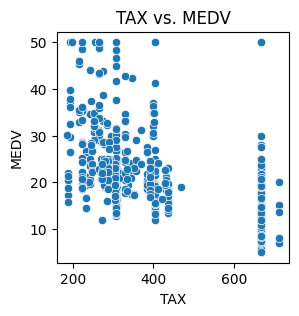

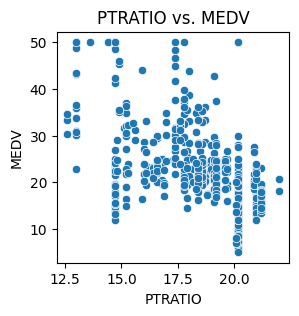

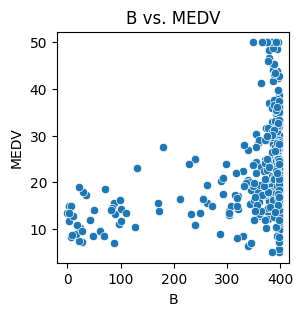

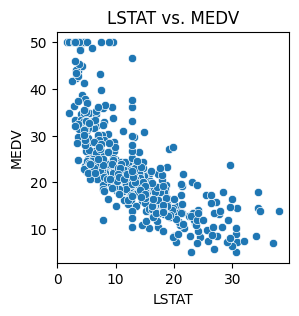

In [ ]:
# Assuming 'data' is your original DataFrame
for col in data.select_dtypes(include=np.number).columns:  # Now 'data' refers to the DataFrame
    if col != 'MEDV':  # medv>> target (Median value of owner-occupied homes)
        # Indented block for the 'if' statement
        plt.figure(figsize=(3, 3))
        sns.scatterplot(x=col, y='MEDV', data=data) # Use 'data' here as well
        plt.title(f'{col} vs. MEDV')
        plt.xlabel(col)
        plt.ylabel('MEDV')
        plt.show()

In [ ]:
# Scale numerical features
scaler = MinMaxScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print("Scaled dataset:")
print(data.head())


Scaled dataset:
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000  0.303130  0.693333  


In [ ]:
# Split dataset into features and target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Implementing Linear Regression using scikit-learn
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)


In [ ]:
# Evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


In [ ]:
print(f"Training MSE: {mse_train}")
print(f"Test MSE: {mse_test}")
print(f"Training R²: {r2_train}")
print(f"Test R²: {r2_test}")

Training MSE: 0.011067028727055636
Test MSE: 0.012354405937700184
Training R²: 0.7420299863537106
Test R²: 0.6588520195508115


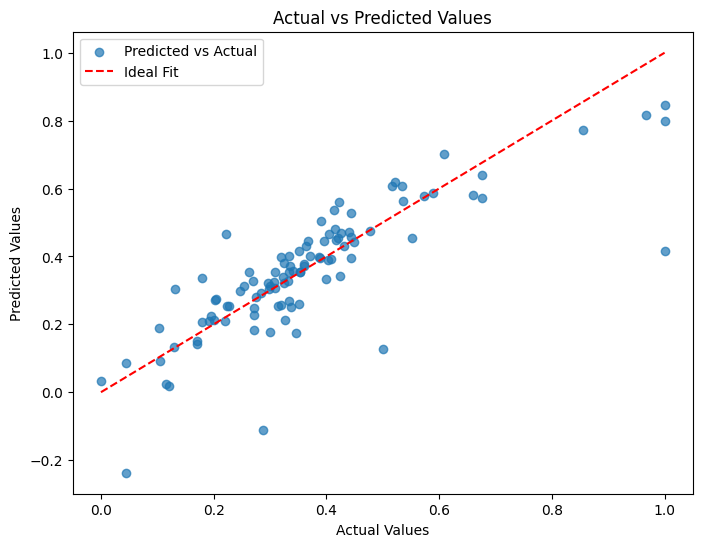

In [ ]:
# Visualizing actual vs predicted values for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [ ]:
# Hyperparameter Tuning: Learning rate experiment with gradient descent
class GradientDescent:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            cost = (1 / (2 * n_samples)) * np.sum((y_pred - y) ** 2)
            self.history.append(cost)

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [ ]:
# Experimenting with gradient descent
learning_rate = 0.01
iterations = 1000
gd_model = GradientDescent(learning_rate=learning_rate, iterations=iterations)
gd_model.fit(X_train.values, y_train.values)

In [ ]:
# Gradient Descent Predictions
y_train_gd_pred = gd_model.predict(X_train.values)
y_test_gd_pred = gd_model.predict(X_test.values)

In [ ]:
# Gradient Descent Evaluation
mse_train_gd = mean_squared_error(y_train, y_train_gd_pred)
mse_test_gd = mean_squared_error(y_test, y_test_gd_pred)
r2_train_gd = r2_score(y_train, y_train_gd_pred)
r2_test_gd = r2_score(y_test, y_test_gd_pred)


In [ ]:
print(f"Gradient Descent Training MSE: {mse_train_gd}")
print(f"Gradient Descent Test MSE: {mse_test_gd}")
print(f"Gradient Descent Training R²: {r2_train_gd}")
print(f"Gradient Descent Test R²: {r2_test_gd}")

Gradient Descent Training MSE: 0.02080721447756505
Gradient Descent Test MSE: 0.018435417316388432
Gradient Descent Training R²: 0.5149883916361012
Gradient Descent Test R²: 0.49093421262514636


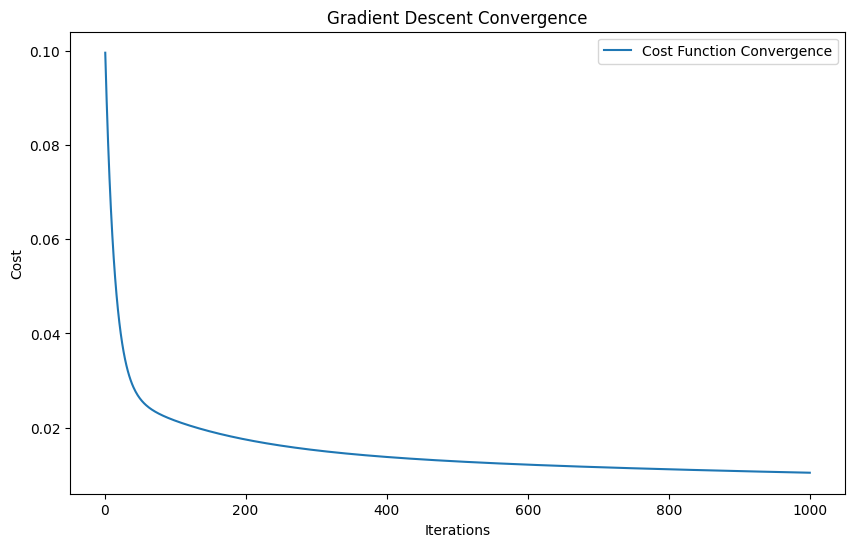

In [ ]:
# Cost function convergence visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations + 1), gd_model.history, label='Cost Function Convergence')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.show()


# Boston Housing Prices Prediction Project

## Overview

This project predicts housing prices in Boston based on various features using linear regression. The implementation includes data preprocessing, exploratory data analysis, model training, evaluation, and gradient descent optimization.

## Dataset

The dataset used is the Boston Housing dataset. It contains information about housing in Boston suburbs, including:

- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- NOX: Nitric oxide concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built before 1940.
- DIS: Weighted distances to five Boston employment centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property-tax rate per \$10,000.
- PTRATIO: Pupil-teacher ratio by town.
- B: Proportion of Black population in town.
- LSTAT: Percentage of lower status population.
- MEDV: Median value of owner-occupied homes (target variable).

## Features of the Implementation

1. **Data Preprocessing**

   - Handled duplicate and missing values.
   - Scaled numerical features using MinMaxScaler.

2. **Exploratory Data Analysis (EDA)**

   - Visualized relationships between features and the target variable (`MEDV`).

3. **Model Implementation**

   - Used linear regression from scikit-learn.
   - Implemented gradient descent from scratch for linear regression.

4. **Hyperparameter Tuning**

   - Experimented with different learning rates for gradient descent.
   - Visualized cost function convergence.

5. **Evaluation**

   - Assessed model performance using Mean Squared Error (MSE) and R-squared metrics.

## Setup Instructions

### Prerequisites

- Python 3.7+
- Google Colab or Jupyter Notebook
- Required libraries:
  - pandas
  - numpy
  - matplotlib
  - seaborn
  - scikit-learn

### Running in Google Colab

1. **Upload the Dataset**

   - Download the dataset from [Kaggle](https://www.kaggle.com/datasets/altavish/boston-housing-dataset).
   - Upload it to your Google Colab workspace.

2. **Install Required Libraries**

   ```python
   !pip install kaggle
   ```

3. **Upload ************`kaggle.json`************ API Key**

   - Generate your Kaggle API key from your Kaggle account settings.
   - Upload the file `kaggle.json` to Colab.

4. **Download Dataset via Kaggle API**

   ```python
   !mkdir ~/.kaggle
   !cp kaggle.json ~/.kaggle/
   !chmod 600 ~/.kaggle/kaggle.json
   !kaggle datasets download -d altavish/boston-housing-dataset
   !unzip boston-housing-dataset.zip
   ```

5. **Run the Implementation**

   - Load the dataset into pandas DataFrame.
   - Execute cells to preprocess, visualize, and train models.

### Local Setup

1. **Clone or Download the Repository**

   ```bash
   git clone <repository-link>
   cd <repository-folder>
   ```

2. **Install Dependencies**

   ```bash
   pip install -r requirements.txt
   ```

3. **Run Jupyter Notebook**

   ```bash
   jupyter notebook
   ```

## Outputs

- Scatter plots showing feature-target relationships.
- Scaled data ready for model training.
- Linear regression model evaluation using MSE and R-squared.
- Cost function convergence plot for gradient descent.

## Evaluation Metrics

- **Mean Squared Error (MSE):** Measures average squared difference between predicted and actual values.
- **R-squared (R²):** Indicates how well the model explains variance in the target variable.

## Key Findings

- Gradient descent convergence depends heavily on the learning rate.
- Feature scaling improves model performance and convergence speed.

## Future Enhancements

- Include polynomial regression for non-linear relationships.
- Experiment with regularization techniques (Lasso, Ridge).
- Explore additional datasets for housing price prediction.

---

**Author:** Sara ELwakeel **Contact:** sarasamy2004\@gmail.com


